In [1]:
loans = read.csv("loan_data.csv")
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [2]:
head(loans)

credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,debt_consolidation,0.1189,829.10,11.35041,19.48,737,5639.958,28854,52.1,0,0,0,0
1,credit_card,0.1071,228.22,11.08214,14.29,707,2760.000,33623,76.7,0,0,0,0
1,debt_consolidation,0.1357,366.86,10.37349,11.63,682,4710.000,3511,25.6,1,0,0,0
1,debt_consolidation,0.1008,162.34,11.35041,8.10,712,2699.958,33667,73.2,1,0,0,0
1,credit_card,0.1426,102.92,11.29973,14.97,667,4066.000,4740,39.5,0,1,0,0
1,credit_card,0.0788,125.13,11.90497,16.98,727,6120.042,50807,51.0,0,0,0,0


In [3]:
summary(loans)

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd 

In [4]:
loans$inq.last.6mths = factor(loans$inq.last.6mths)
loans$delinq.2yrs = factor(loans$delinq.2yrs)
loans$pub.rec = factor(loans$pub.rec)
loans$not.fully.paid = factor(loans$not.fully.paid)
loans$credit.policy = factor(loans$credit.policy)

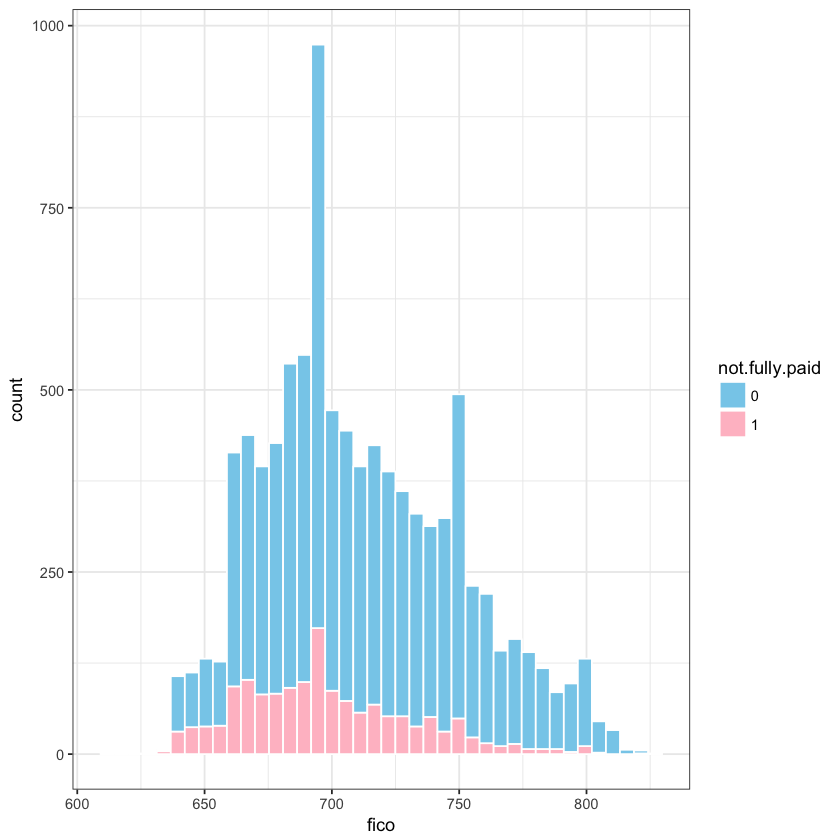

In [5]:
library(ggplot2)
ggplot(data = loans, aes(x = fico)) + geom_histogram(aes(fill = not.fully.paid), color = 'white', bins = 40) +
        scale_fill_manual(values = c("skyblue", "pink")) + theme_bw()

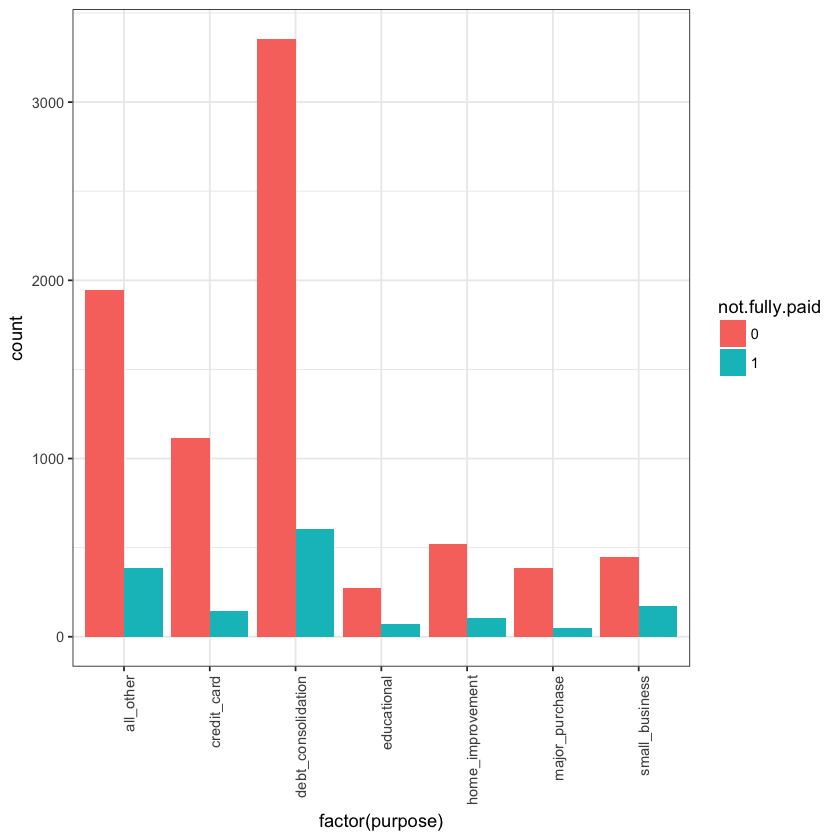

In [6]:
ggplot(data = loans, aes(x = factor(purpose))) + 
       geom_bar(aes(fill = not.fully.paid),  position = 'dodge') + theme_bw() +
       theme(axis.text.x = element_text(angle = 90, hjust = 1))

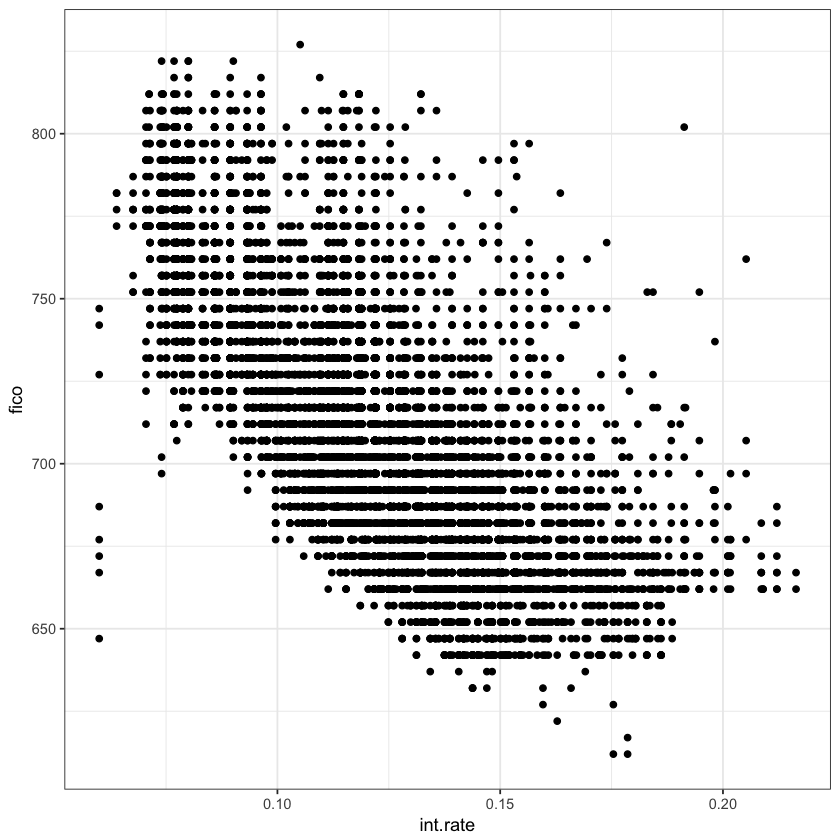

In [7]:
ggplot(loans, aes(int.rate, fico)) + geom_point() + theme_bw()

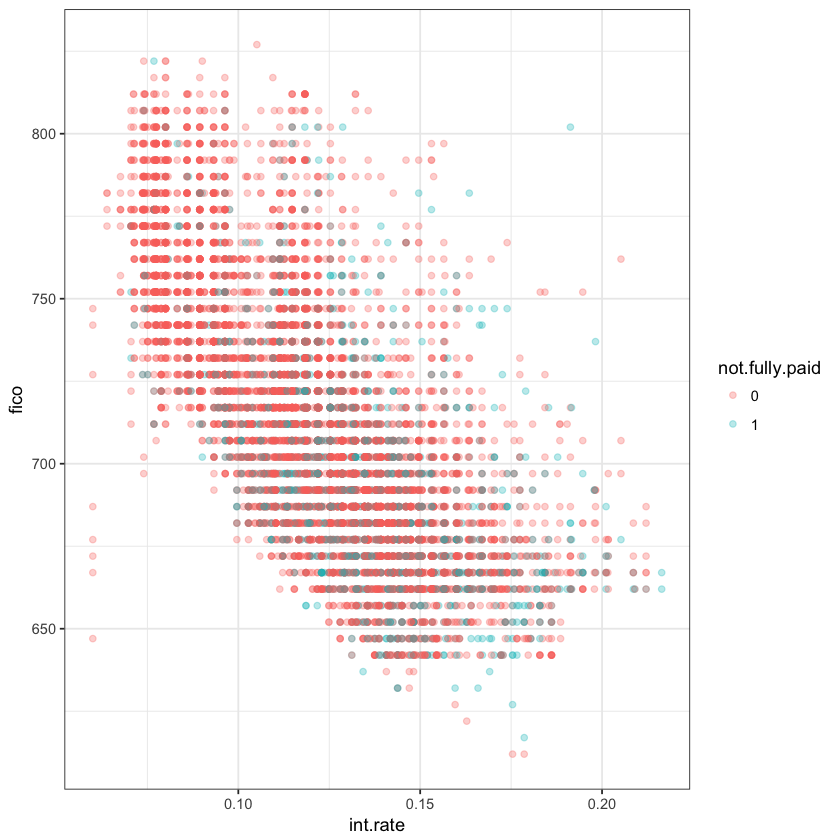

In [8]:
ggplot(loans, aes(int.rate, fico)) + geom_point(aes(color = not.fully.paid), alpha = 0.3) + theme_bw()

In [9]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
split = sample.split(loans$not.fully.paid, SplitRatio = 0.75)
training_set = subset(loans, split == TRUE)
test_set = subset(loans, split == FALSE)

In [10]:
# Fitting SVM to the Training set
library(e1071)
classifier = svm(formula =  not.fully.paid ~ ., data = training_set,
                 type = 'C-classification', kernel = 'radial')




In [11]:
summary(classifier)


Call:
svm(formula = not.fully.paid ~ ., data = training_set, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01724138 

Number of Support Vectors:  2972

 ( 1822 1150 )


Number of Classes:  2 

Levels: 
 0 1




In [12]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[1:13])

# Making the Confusion Matrix
cm = table(y_pred, test_set$not.fully.paid)
cm

      
y_pred    0    1
     0 2011  383
     1    0    0